Title:- Titanic survival analysis

Author:- Shivam Adhau 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings(action='ignore')



In [3]:
pd.set_option('display.max_columns',10,'display.width',1000)
td = pd.read_csv('Titanic-Dataset.csv')


In [4]:
td.head(10)

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,...,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,...,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,...,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,...,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,...,0,237736,30.0708,NaN,C


In [5]:
td = pd.read_csv('Titanic-Dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
null_values = td.isnull().sum()
print(f"Shape of the dataset: {td.shape}")
print(null_values)

Shape of the dataset: (891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
td.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
td.groupby('Survived').mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


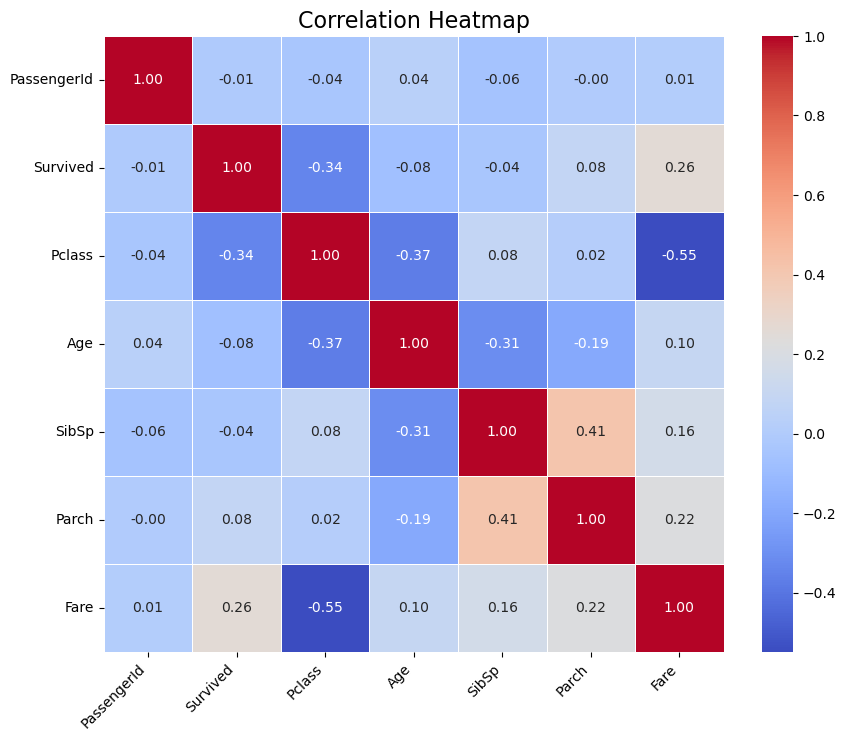

In [8]:
#Correlation Heatmap

numerical_td = td.select_dtypes(include=['number'])
td_corr = numerical_td.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(td_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [9]:
#No of males and females on the ship

male_ind = len(td[td['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)
female_ind = len(td[td['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Males in Titanic: 577
No of Females in Titanic: 314


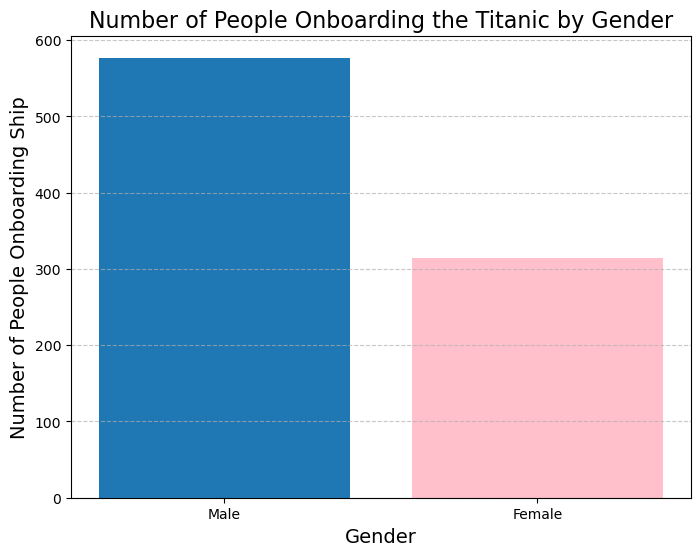

In [10]:
#Genders onboarding Titanic

gender = ['Male', 'Female']
index = [577, 314]
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(gender, index, color=['#1f77b4', '#ffc0cb'])
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of People Onboarding Ship", fontsize=14)
plt.title("Number of People Onboarding the Titanic by Gender", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

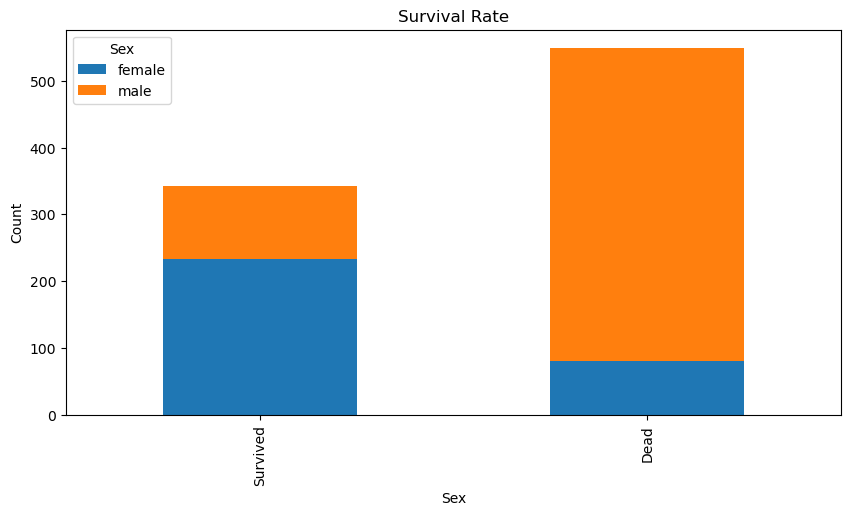

Survival Rates by Sex:
------------------------
Survived:
 Sex
female    233
male      109
Name: count, dtype: int64
Dead:
 Sex
male      468
female     81
Name: count, dtype: int64


In [11]:
def bar_chart(feature, title="Survival Rate"):
    survived = td[td['Survived'] == 1][feature].value_counts()
    dead = td[td['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the bar chart
    df.plot(kind='bar', stacked=True, ax=ax)

    # Set title and labels
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Show the plot
    plt.show()

# Example usage:
bar_chart('Sex')

# Print survival rates
print("Survival Rates by Sex:")
print("------------------------")
print("Survived:\n", td[td['Survived'] == 1]['Sex'].value_counts())
print("Dead:\n", td[td['Survived'] == 0]['Sex'].value_counts())

In [12]:
survival_counts = td["Survived"].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']
print(survival_counts.to_markdown(index=False))

|   Survived |   Count |
|-----------:|--------:|
|          0 |     549 |
|          1 |     342 |


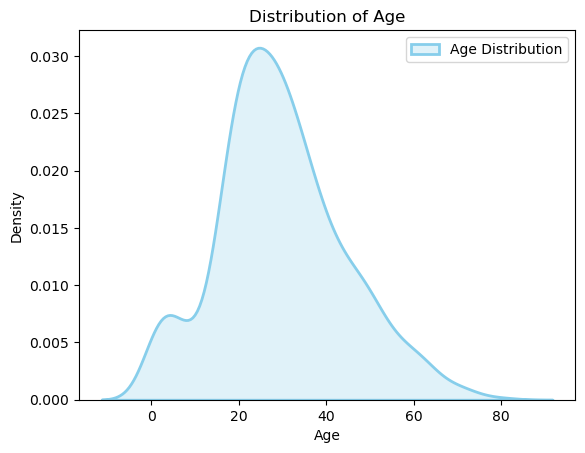

In [13]:
#Age distribution of peoples on board
sns.kdeplot(td['Age'], 
            shade=True,  
            color='skyblue',  
            linewidth=2,  
            label='Age Distribution')  


plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

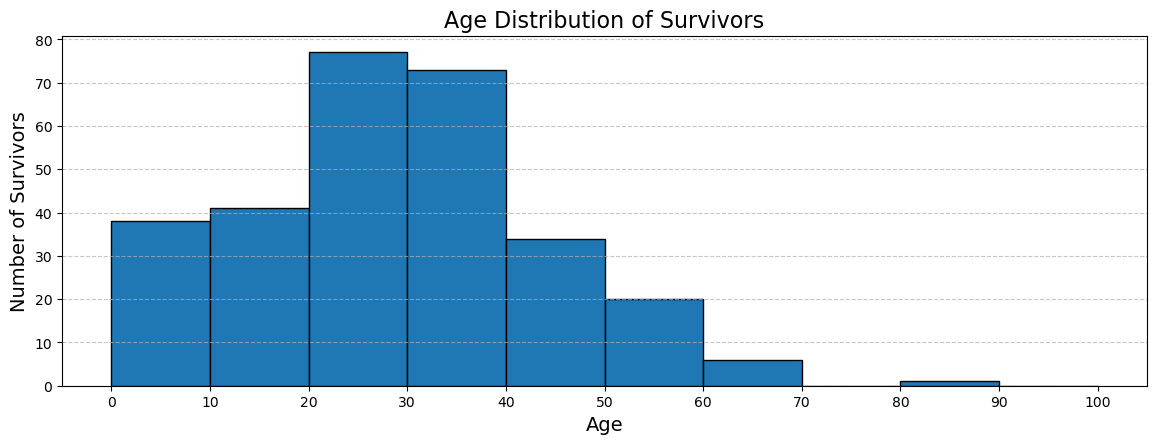

In [14]:
plt.figure(figsize=(14, 10))

#Age Distribution of Non-Survivors

plt.subplot(2, 1, 1)
age_survived = td.loc[td['Survived'] == 1, 'Age'].dropna()
plt.hist(age_survived, bins=np.arange(0, 101, 10), color='#1f77b4', edgecolor='black')
plt.title('Age Distribution of Survivors', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Survivors', fontsize=14)
plt.xticks(np.arange(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)




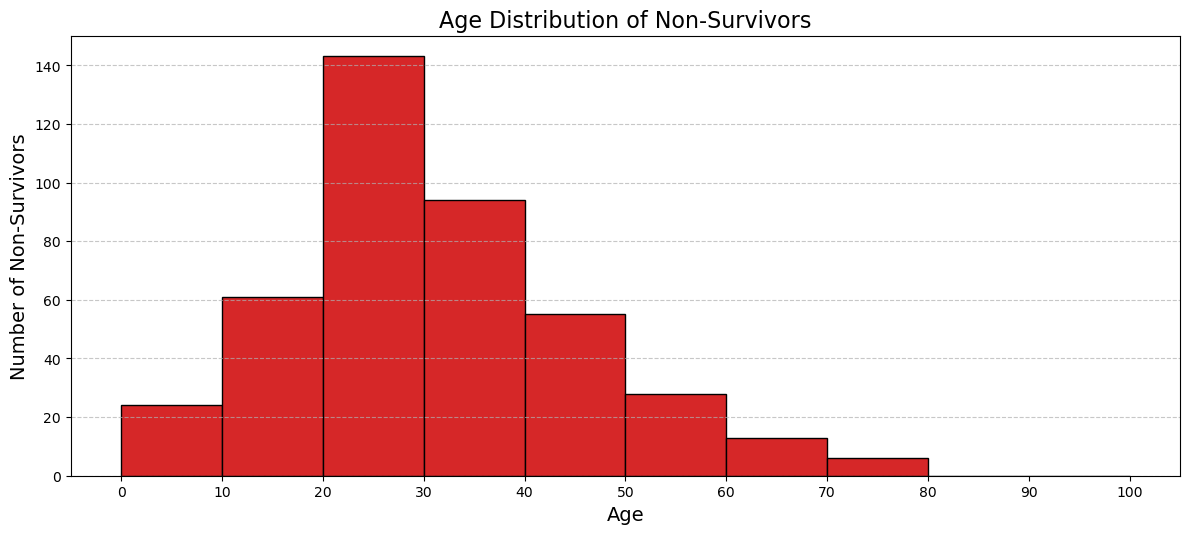

In [15]:
plt.figure(figsize=(12, 10))

#Age Distribution of Non-Survivors

plt.subplot(2, 1, 2)
age_non_survived = td.loc[td['Survived'] == 0, 'Age'].dropna()
plt.hist(age_non_survived, bins=np.arange(0, 101, 10), color='#d62728', edgecolor='black')
plt.title('Age Distribution of Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Non-Survivors', fontsize=14)
plt.xticks(np.arange(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [16]:
td[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)




,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Figure size 1200x600 with 0 Axes>

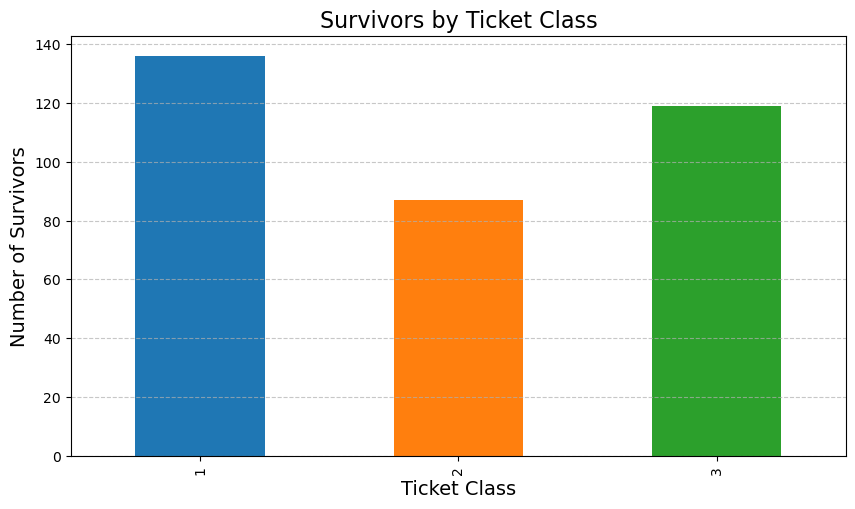

In [17]:
#survivors by ticket class

plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
td.loc[td['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar(color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Survivors by Ticket Class', fontsize=16)
plt.xlabel('Ticket Class', fontsize=14)
plt.ylabel('Number of Survivors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)




<Figure size 1200x600 with 0 Axes>

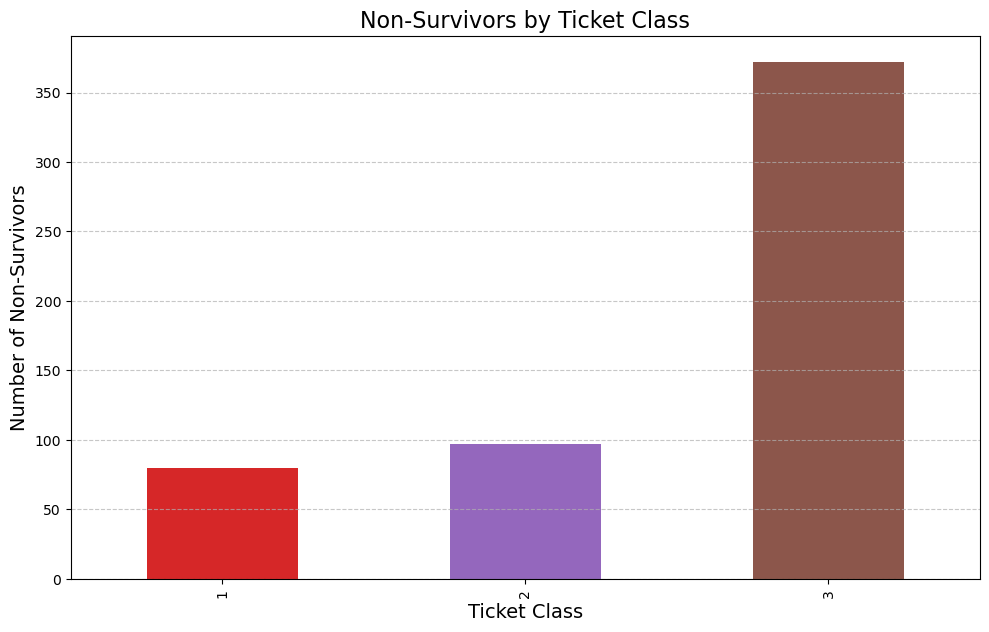

In [18]:
#non-survivors by ticket class

plt.figure(figsize=(12, 6))
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 2)
td.loc[td['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar(color=['#d62728', '#9467bd', '#8c564b'])
plt.title('Non-Survivors by Ticket Class', fontsize=16)
plt.xlabel('Ticket Class', fontsize=14)
plt.ylabel('Number of Non-Survivors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()




In [19]:
td[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)




,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
td[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)




,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


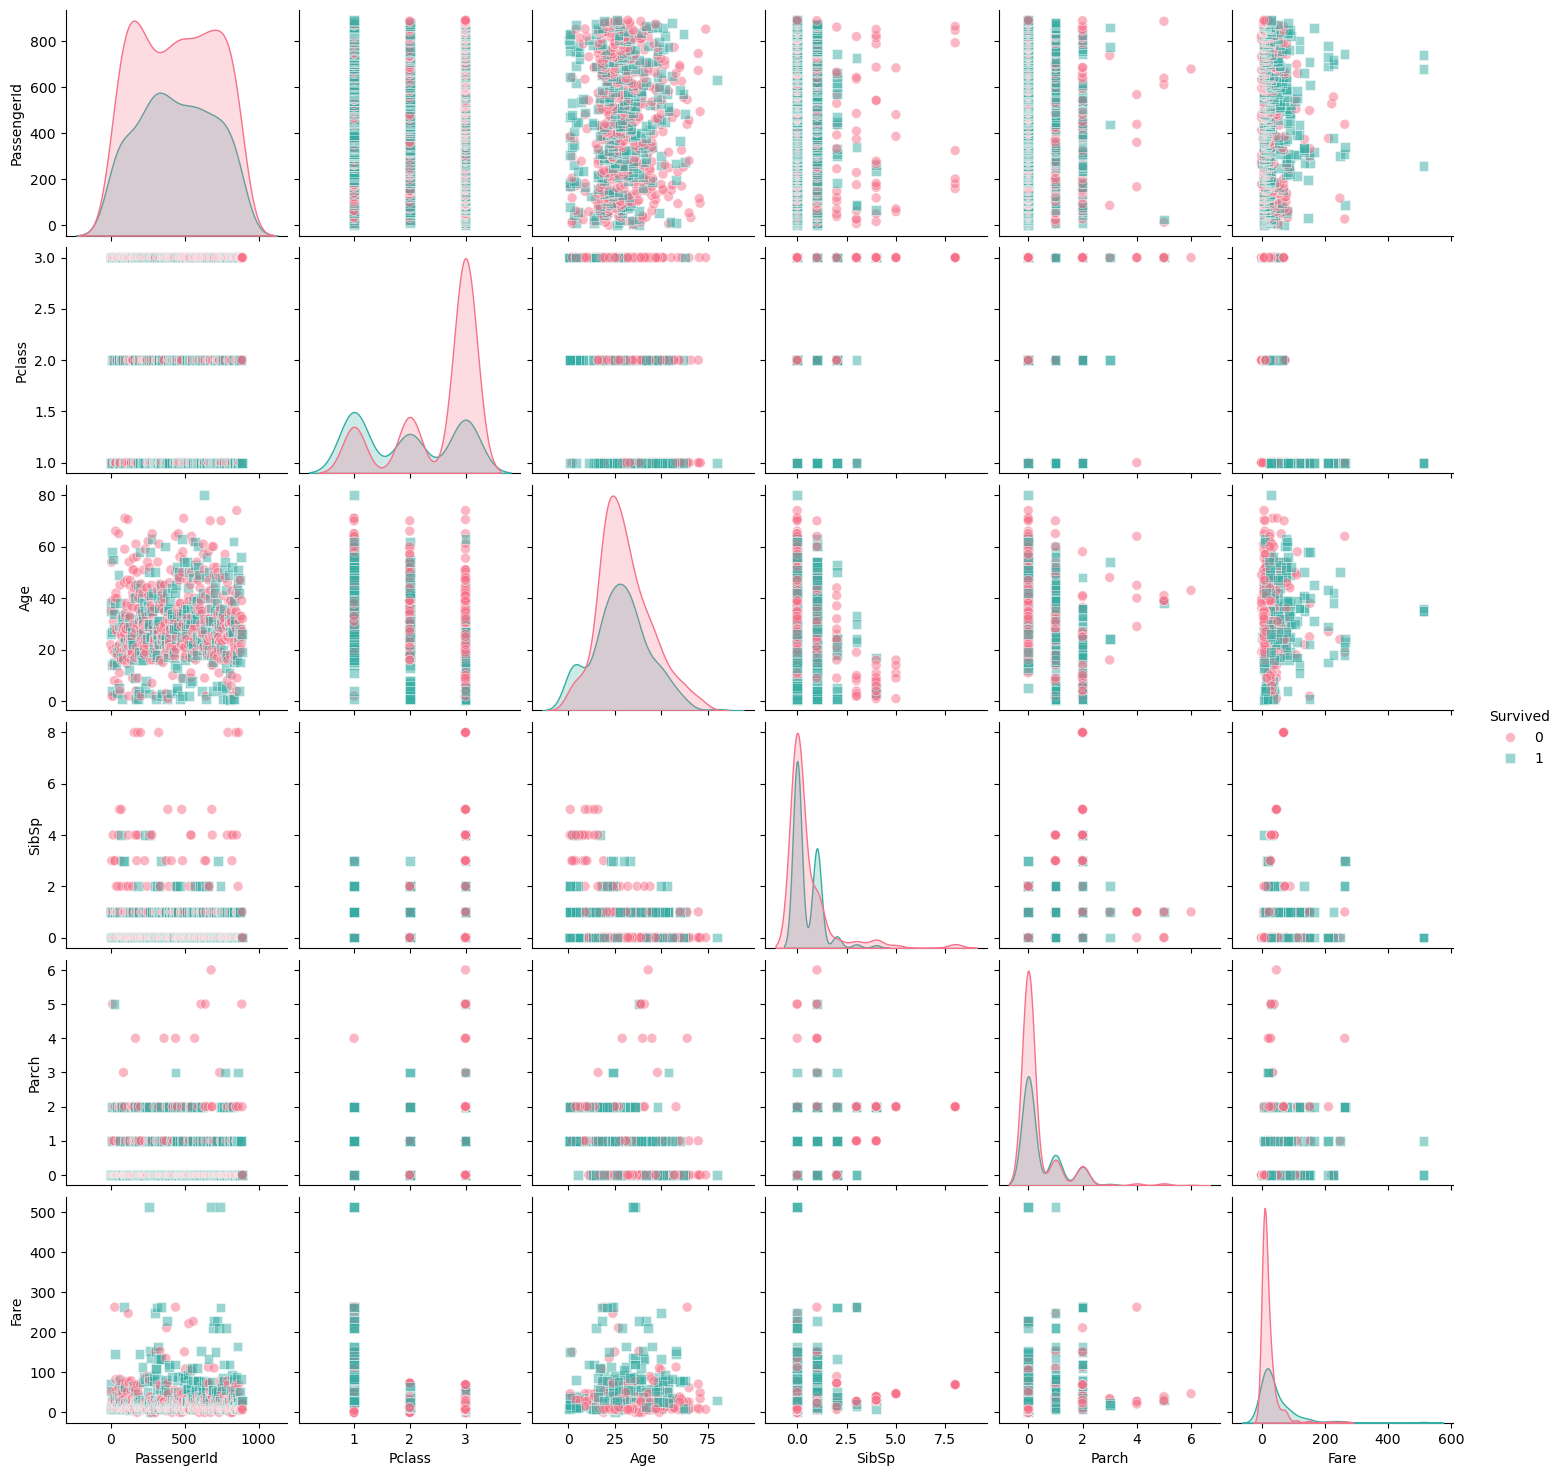

In [21]:


sns.pairplot(td, 
            hue='Survived', 
            palette='husl', 
            markers=['o', 's'],  
            diag_kind='kde',  
            plot_kws={'alpha': 0.5, 's': 50},  
            diag_kws={'shade': True})  
plt.show()

In [22]:
td[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)




,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


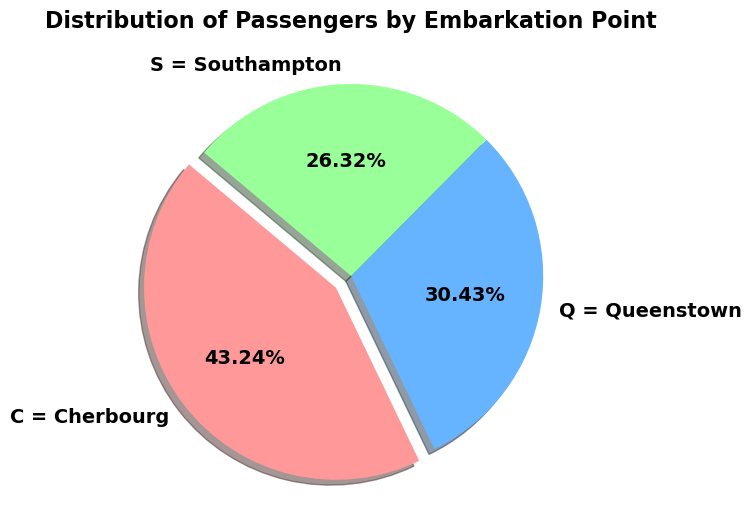

In [23]:
#Distribution of Passengers by Embarkation Point

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

labels = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
sizes = [0.553571, 0.389610, 0.336957]
explode = (0.1, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
       shadow=True, startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold'})


plt.title('Distribution of Passengers by Embarkation Point', fontsize=16, fontweight='bold')
plt.show()

In [24]:
td = td.drop(['Ticket'], axis = 1)
td = td.drop(['Cabin'], axis = 1)
td = td.drop(['Name'], axis = 1)




In [25]:
column_td=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=td[column_td]
Y=td['Survived']




In [26]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()




2

In [27]:

X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()




0

In [28]:
X= td[['Pclass','Sex']]
Y= td['Survived']




In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [30]:
le = LabelEncoder()
logreg=LogisticRegression()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
logreg.fit(X_train, Y_train)




LogisticRegression()

In [31]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [32]:
warnings.filterwarnings('ignore')
res= logreg.predict([[2,0]])
if (res==0):
    print("Not Survived")
else:
    print("Survived")

Survived
